In [42]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, fbeta_score
import seaborn as sns
import matplotlib.pyplot as plt

bnotes = pd.read_csv("bank.csv")
print(bnotes.head())
print(bnotes['Class'].unique())

   Image.Var  Image.Skew  Image.Curt  Entropy  Class
0    3.62160      8.6661     -2.8073 -0.44699      0
1    4.54590      8.1674     -2.4586 -1.46210      0
2    3.86600     -2.6383      1.9242  0.10645      0
3    3.45660      9.5228     -4.0112 -3.59440      0
4    0.32924     -4.4552      4.5718 -0.98880      0
[0 1]


In [43]:
bnotes.shape

(1372, 5)

In [44]:
bnotes.describe(include = 'all')

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


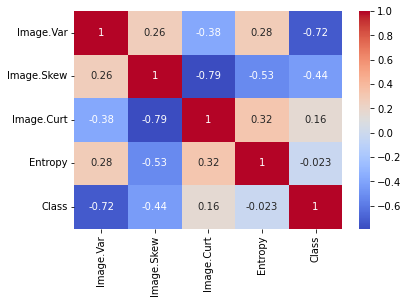

In [45]:
# Compute correlation matrix
corr = bnotes.corr()

# Plot heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Show plot
plt.show()


In [30]:
X = bnotes.drop('Class', axis=1)
y = bnotes['Class']
print(X.head(2))
print(y.head(2))

   Image.Var  Image.Skew  Image.Curt  Entropy
0     3.6216      8.6661     -2.8073 -0.44699
1     4.5459      8.1674     -2.4586 -1.46210
0    0
1    0
Name: Class, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
print(X_train.shape)
print(y_test.shape)

(960, 4)
(412,)


In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
mlp = MLPClassifier(max_iter=500, activation='relu')
mlp

MLPClassifier(max_iter=500)

In [34]:
mlp.fit(X_train,y_train)

MLPClassifier(max_iter=500)

In [41]:
#evaluate the model
from sklearn.model_selection import train_test_split, cross_val_score

# Evaluate the model using cross-validation
folds = 5
scores = cross_val_score(mlp, X_train, y_train, cv=folds, scoring='f1_macro')

print(f'{folds}-Fold Cross Validation Results:')
print('Scores:', scores)
print('Mean:', np.mean(scores))
print('Standard Deviation:', np.std(scores))

5-Fold Cross Validation Results:
Scores: [1. 1. 1. 1. 1.]
Mean: 1.0
Standard Deviation: 0.0


In [35]:
pred = mlp.predict(X_test)
pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(y_test,pred)

array([[221,   0],
       [  0, 191]], dtype=int64)

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       191

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [39]:

print(f'F2 Score: {fbeta_score(y_test,pred, beta=2):.2f}')

F2 Score: 1.00
